<a href="https://colab.research.google.com/github/Stonetenth2005/Machine-Learning/blob/main/16-MissingCategoricalData/missing_category_imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


# Imputation using Pandas

In [ ]:
df.isnull().mean()

,0
FireplaceQu,0.472603
GarageQual,0.055479
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

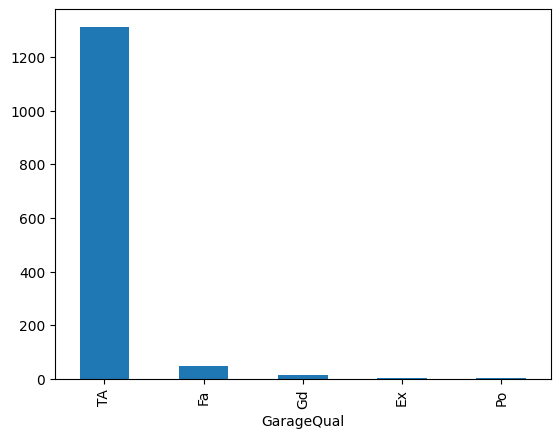

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

In [ ]:
mode = df['GarageQual'].mode()[0]

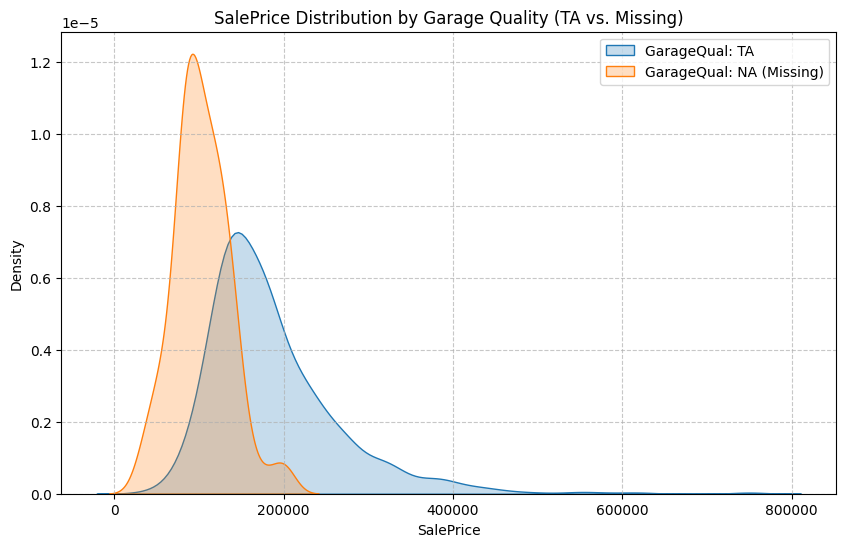

In [ ]:
# Filter data for 'TA' GarageQual
df_ta = df[df['GarageQual'] == 'TA']

# Filter data for missing (NaN) GarageQual
df_na = df[df['GarageQual'].isnull()]

plt.figure(figsize=(10, 6))
sns.kdeplot(df_ta['SalePrice'], label='GarageQual: TA', fill=True, common_norm=False)
sns.kdeplot(df_na['SalePrice'], label='GarageQual: NA (Missing)', fill=True, common_norm=False)
plt.title('SalePrice Distribution by Garage Quality (TA vs. Missing)')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df['GarageQual'].fillna(mode, inplace=True)

/tmp/ipython-input-1735812426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna(mode, inplace=True)


<Axes: xlabel='GarageQual'>

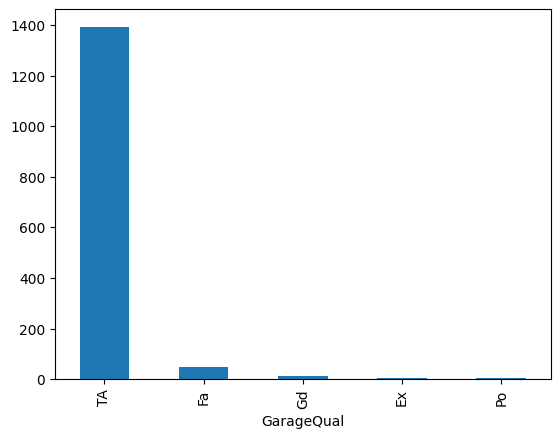

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

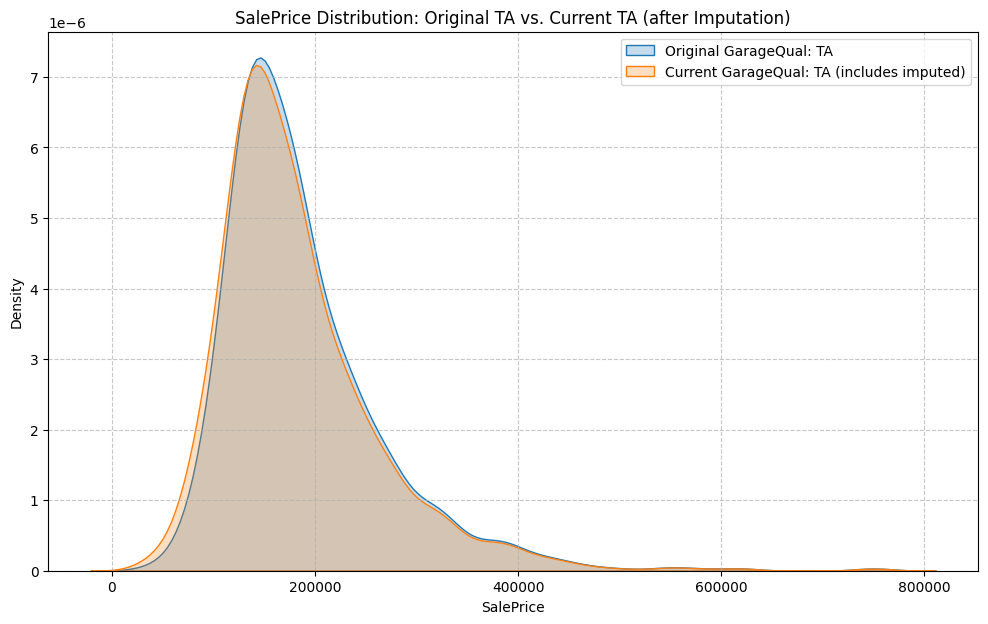

In [ ]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df_ta['SalePrice'], label='Original GarageQual: TA', fill=True, common_norm=False)
sns.kdeplot(df[df['GarageQual'] == 'TA']['SalePrice'], label='Current GarageQual: TA (includes imputed)', fill=True, common_norm=False)

plt.title('SalePrice Distribution: Original TA vs. Current TA (after Imputation)')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Notice the distribution is almost similar to the original column (which is good for us)

## Wrong Imputation

<Axes: xlabel='FireplaceQu'>

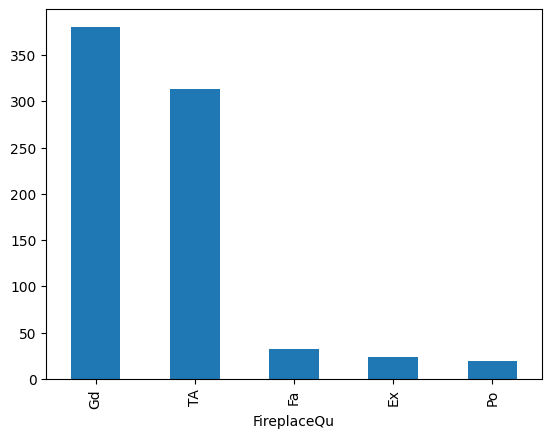

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Notice, there is not proper differance in the mode and 2nd most used category, which is harmful

In [ ]:
mode = df['FireplaceQu'].mode()[0]

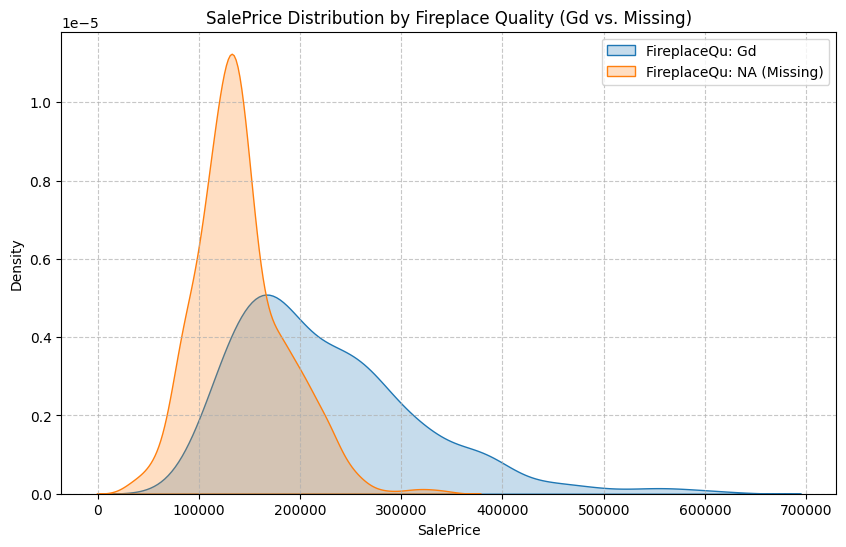

In [ ]:
# Get the mode of 'FireplaceQu'
fireplace_mode = df['FireplaceQu'].mode()[0]

# Filter data for the mode of FireplaceQu
df_fp_mode = df[df['FireplaceQu'] == fireplace_mode]

# Filter data for missing (NaN) FireplaceQu
df_fp_na = df[df['FireplaceQu'].isnull()]

plt.figure(figsize=(10, 6))
sns.kdeplot(df_fp_mode['SalePrice'], label=f'FireplaceQu: {fireplace_mode}', fill=True, common_norm=False)
sns.kdeplot(df_fp_na['SalePrice'], label='FireplaceQu: NA (Missing)', fill=True, common_norm=False)
plt.title(f'SalePrice Distribution by Fireplace Quality ({fireplace_mode} vs. Missing)')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df['FireplaceQu'].fillna(mode, inplace=True)

/tmp/ipython-input-2624975478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna(mode, inplace=True)


<Axes: xlabel='FireplaceQu'>

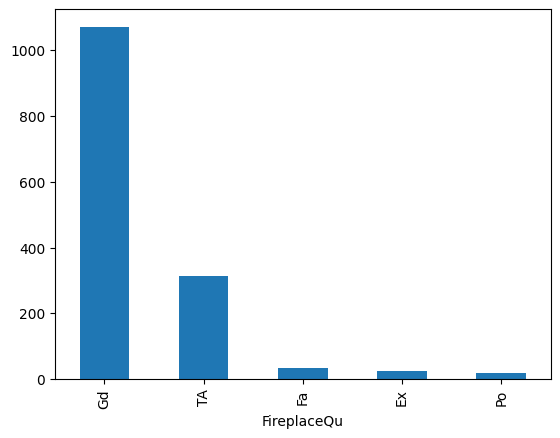

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Notice the steep increase in Gd

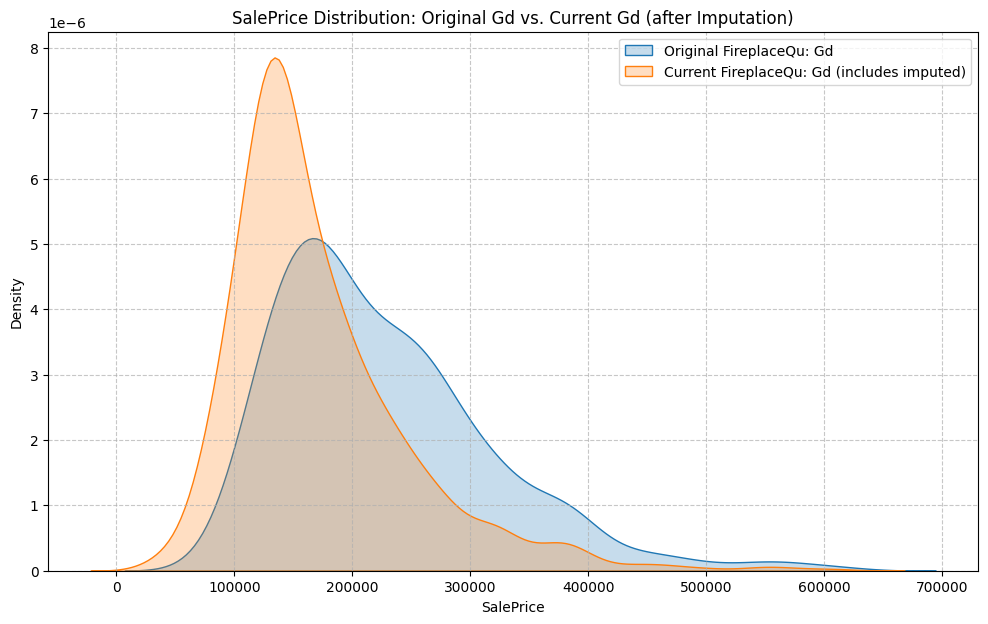

In [ ]:
# df_fp_mode already contains the 'SalePrice' for original 'Gd' FireplaceQu from before imputation
# The current 'df' has the 'FireplaceQu' column with NaNs filled by 'Gd'

fireplace_mode = df['FireplaceQu'].mode()[0] # 'Gd'

plt.figure(figsize=(12, 7))
sns.kdeplot(df_fp_mode['SalePrice'], label=f'Original FireplaceQu: {fireplace_mode}', fill=True, common_norm=False)
sns.kdeplot(df[df['FireplaceQu'] == fireplace_mode]['SalePrice'], label=f'Current FireplaceQu: {fireplace_mode} (includes imputed)', fill=True, common_norm=False)

plt.title(f'SalePrice Distribution: Original {fireplace_mode} vs. Current {fireplace_mode} (after Imputation)')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Notice the change in distribution (Not good).
Therefore, we use df['FireplaceQu'].fillna('missing'), to create a completely new "missing" category

# Imputation using Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2, random_state=0)

In [ ]:
trf = ColumnTransformer(transformers=[
    ('mode_imputer', SimpleImputer(strategy='most_frequent'), ['GarageQual']),
    ('missing_imputer', SimpleImputer(strategy='constant', fill_value='missing'), ['FireplaceQu'])
])

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)